In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [41]:
a = [1,2,3,4]
b = [3,4,5,6]
plt.scatter(a, b)
#plt.show() #this would just display a simpel graph

<h2>linear regression using sklearn</h2>

(100,)
(100,)


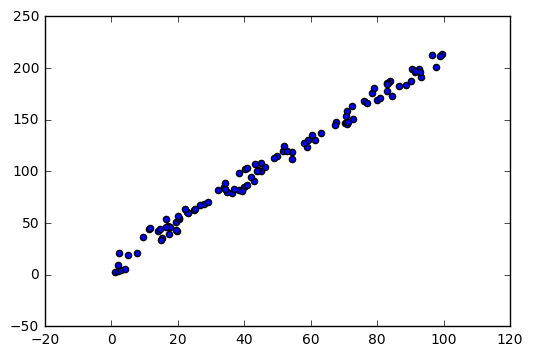

Coefficient is : (ignore the second, that is a dummy)
[ 1.99461819  0.        ]
Intercept is : 
12.7211423462
Equarion is 2x+3


In [42]:
x_orig = np.random.random(100)*100

y_orig = 2*x_orig[0:]+3 + np.random.random(100)*20
x_orig=x_orig.reshape([100,1])
ze = np.zeros([100,1])
x_orig = np.append(x_orig, ze, 1)
x1 = x_orig[:,0]
print x1.shape
print y_orig.shape
plt.scatter(x1, y_orig)
plt.show()
reg = LinearRegression()
reg.fit(x_orig, y_orig)
print "Coefficient is : (ignore the second, that is a dummy)"
print reg.coef_
print "Intercept is : "
print reg.intercept_
print "Equarion is 2x+3"

<h2> linear regression using TF (low level) </h2>

In [43]:
#IMPORTANT POINT: Variables are the values you want to model to tweak. Therefore W and b in this case
#Constants are the points that dont change in the model
#Placeholders are the values that we want to send in / seed to the model. They are NOT tensorflow objects, but numpy (x, and y)

#IS THIS NEEDED, X AND Y TO TF VARS? I DONT THINK TO
#x_train = tf.constant(x_orig, dtype=tf.float32)
#print x_train
x_orig = x_orig[:,0]
x_orig = x_orig.reshape([100,1])

y_orig = y_orig.reshape([100,1])

print x_orig.shape
print y_orig.shape
#print x_orig
#print y_orig
#y_train = tf.constant(y_orig, dtype=tf.float32)
#print y_train
#END OF IS THIS NEEDED. MAYBE JUST THE RESHAPE LINE BUT NOTHING ELSE

#BATCH SIZE MAY BE THE PROBLEM. !00 AT ONE GO IS TOO MUCH 
# Model parameters: Theses are the variables that we want the model to change. Therefore "variables"
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)

# Model input and output : We are doing to be feedling in the x and y from outside. Therefore, placeholders
x = tf.placeholder(tf.float32)

#MAYBE THIS IS THE PROBLEM? We are assuming just one independent variable. BUT we are feeding it two...
linear_model = W * x + b
print linear_model
y = tf.placeholder(tf.float32)

init = tf.global_variables_initializer()

#defining the gradiant descent, and the learning rate. We basically would want to minimize the loss
opt = tf.train.GradientDescentOptimizer(0.0001)
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
train = opt.minimize(loss)

with tf.Session() as session:
    session.run(init)
    for i in range(1000):
        #since train uses loss, which needs y and linear model which needs x, need to feed it both x and y
        session.run(train, {x:x_orig, y:y_orig})
        #since W needs x and loss needs y, to pass both
        curr_W, curr_b, curr_loss  = session.run([W, b, loss], {x:x_orig, y:x_orig})
        print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))
print "done"


(100, 1)
(100, 1)
Tensor("add_12:0", dtype=float32)
W: [ 124.30063629] b: [ 1.65504789] loss: 4.98023e+09
W: [-7874.37402344] b: [-120.43015289] loss: 2.03182e+13
W: [ 508077.03125] b: [ 7758.63525391] loss: 8.45669e+16
W: [-32773170.] b: [-500473.4375] loss: 3.51868e+20
W: [  2.11402099e+09] b: [ 32282844.] loss: 1.46407e+24
W: [ -1.36364106e+11] b: [ -2.08239245e+09] loss: 6.09177e+27
W: [  8.79611399e+12] b: [  1.34323929e+11] loss: 2.53469e+31
W: [ -5.67390010e+14] b: [ -8.66451299e+12] loss: 1.05465e+35
W: [  3.65992761e+16] b: [  5.58901175e+14] loss: inf
W: [ -2.36082216e+18] b: [ -3.60517064e+16] loss: inf
W: [  1.52283909e+20] b: [  2.32550145e+18] loss: inf
W: [ -9.82301507e+21] b: [ -1.50005562e+20] loss: inf
W: [  6.33629806e+23] b: [  9.67604910e+21] loss: inf
W: [ -4.08720450e+25] b: [ -6.24149909e+23] loss: inf
W: [  2.63643523e+27] b: [  4.02605493e+25] loss: inf
W: [ -1.70062221e+29] b: [ -2.59699077e+27] loss: inf
W: [  1.09697977e+31] b: [  1.67517866e+29] loss: inf


<h2> linear regression using TF (low level) </h2>